In [1]:
# Remover os warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importar as ferramentas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# A função learning_curve retorna uma matriz com os resultados do cálculo da curva de aprendizado de um algoritmo.
# Os parâmetros necessários são:
# - Um estimador para ser treinado
# - As entradas (X) de treinamento
# - As saídas (y) de treinamento
# - O número - opcional - de pontos para avaliação do treinamento. São porcentagens do total de dados de treinamento.
# - A quantidade de 'folds' de validação cruzada (cv) - o padrão é 3.

from sklearn.model_selection import learning_curve


# A função plot_learning_curve desenha um gráfico com os dados da matriz.
def plot_learning_curve(estimator, X, y, cv=None):
    
    # O gráfico é inicializado com as características principais
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    # Calculamos os valores da curva de aprendizado, acrescentando os dados de 10 em 10 %
    sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
    points, score_in, score_out = learning_curve(estimator, X, y, train_sizes=sizes, cv=cv)
    
    # Tiramos a média e o desvio padrão de cada sequência de testes. 
    # Por padrão é feita validação cruzada em 3 conjuntos de dados.
    mean_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    mean_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    # O desempenho de treinamento fica em vermelho e o de validação em verde
    plt.plot(points, mean_in, 'o-', color='red', label='Treinamento')
    plt.plot(points, mean_out, 'o-', color='green', label='Teste')
    
    # Os desvios ficam ao redor das linhas para indicar a variação no aprendizado
    plt.fill_between(points, mean_in - std_in,
                     mean_in + std_in, color='red', alpha=0.1)
    plt.fill_between(points, mean_out - std_out,
                     mean_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [4]:
# A função validation_curve retorna uma matriz com os resultados dos scores de um algoritmo com a variação de
# algum dos parâmetros da instância.
# Os parâmetros necessários são:
# - Um estimador para ser treinado
# - As entradas (X) de treinamento
# - As saídas (y) de treinamento
# - O nome do parâmetro (p) que será variado
# - Uma lista de valores (p_range) que serão atribuídos ao parâmetro, a cada execução
# - A quantidade de 'folds' de validação cruzada (cv) - o padrão é 3.
# - Escala logarítmica para o eixo X (o padrão é True)

from sklearn.model_selection import validation_curve

# A função plot_validation_curve desenha um gráfico com os dados da matriz. É similar à plot_learning_curve.
def plot_validation_curve(estimator, X, y, p, p_range, cv=None, log=True):
    plt.figure()
    plt.title('Curva de Validação')
    plt.xlabel('Parâmetro')
    plt.ylabel('Desempenho')
    plt.grid()
    if log:
        plt.xscale('log')
    
    score_in, score_out = validation_curve(estimator, X, y, p, p_range, cv=cv)
    
    media_in = np.mean(score_in, axis=1)
    std_in = np.std(score_in, axis=1)
    media_out = np.mean(score_out, axis=1)
    std_out = np.std(score_out, axis=1)
    
    plt.plot(p_range, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(p_range, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(p_range, media_in - std_in, 
                     media_in + std_in, color='red', alpha=0.1)
    plt.fill_between(p_range, media_out - std_out, 
                     media_out + std_out, color='green', alpha=0.1)
    
    plt.legend()
    return plt

In [5]:
# A função plot_confusion_matrix foi tirada da documentação oficial do scikit-learn.
# Vamos usá=la para mostrar os dados da matriz de confusão de forma mais organizada.

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [6]:
# Ler os dados, fazer uma cópia de segurança e verificar o formato do dataset

all_data = pd.read_csv('Tweets.csv')
backup = all_data.copy()
all_data.shape

(14640, 15)

In [7]:
# O método info() nos mostra as colunas do dataset, e a maioria delas parece irrelevante para o problema.
# Algumas das colunas foram preenchidas por pessoas, após a coleta dos tweets, e não vamos considerá-las.

# O próprio nome da companhia aérea pode não ser relevante. Vamos verificar se é possível usar as coordenadas,
# localização e número de retweets.

all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [8]:
# Espiar os dados para ver os formatos

all_data.sample(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12277,570245367607857153,positive,1.0000,NaN,NaN,American,NaN,ShpprMktMichael,NaN,0,@AmericanAir thanks for the update,NaN,2015-02-24 07:34:24 -0800,USA,NaN
12494,570152557475028992,negative,1.0000,Bad Flight,0.3596,American,NaN,cootiepoop,NaN,0,@AmericanAir just went to check into flight 24...,NaN,2015-02-24 01:25:37 -0800,"new orleans, la",Central Time (US & Canada)
11159,568472775729516544,neutral,0.6729,NaN,0.0000,US Airways,NaN,AdamJEstep,NaN,0,@AlbertBreer just so you know who to complain ...,NaN,2015-02-19 10:10:46 -0800,Harrisburg,NaN
14139,569662113989439488,negative,1.0000,Customer Service Issue,0.6524,American,NaN,Davitossss,NaN,1,@AmericanAir now I have to pay for a hotel a c...,NaN,2015-02-22 16:56:46 -0800,NaN,NaN
14580,569596325076955137,negative,0.6667,Cancelled Flight,0.6667,American,NaN,nicoeats,NaN,0,@AmericanAir I'm on flight 1027 tomorrow that ...,NaN,2015-02-22 12:35:21 -0800,"Tokyo, Japan",Eastern Time (US & Canada)


In [9]:
# Podemos ver que a maioria dos tweets está sem as coordenadas. Não conseguiremos estimar ou preencher,
# então descartaremos a coluna.

all_data['tweet_coord'].isnull().sum()

13621

In [10]:
# A maioria dos dados tem localização. Mas...

all_data['tweet_location'].isnull().sum()

4733

In [11]:
# ... os dados não parecem ter nenhuma qualidade. Não parece uma boa feature.

all_data['tweet_location']

0                                  NaN
1                                  NaN
2                            Lets Play
3                                  NaN
4                                  NaN
5                                  NaN
6                     San Francisco CA
7                          Los Angeles
8                            San Diego
9                          Los Angeles
10                     1/1 loner squad
11                                 NYC
12                                 NYC
13                                 NaN
14                   San Francisco, CA
15                       palo alto, ca
16                         west covina
17               this place called NYC
18        Somewhere celebrating life. 
19                    Boston | Waltham
20                                 NaN
21                                 NaN
22                         Los Angeles
23                         Boston, MA 
24                                 714
25                       

In [12]:
# A enorme maioria dos tweets não teve sequer um retweet. Também não parece uma boa coluna.

all_data['retweet_count'].value_counts()

0     13873
1       640
2        66
3        22
4        17
5         5
7         3
6         3
22        2
8         1
32        1
9         1
31        1
18        1
15        1
28        1
44        1
11        1
Name: retweet_count, dtype: int64

In [13]:
# Vamos manter somente as colunas 'text' e 'airline_sentiment' nos dados.
# Nosso problema se tornou uma análise de sentimento direta a partir de texto.

all_data = all_data.loc[:, ['text', 'airline_sentiment']]

In [14]:
# Podemos verificar também a distribuição dos tweets analisados.
# Podemos ver que há muito mais tweets negativos do que positivos ou neutros.

# Sugestão de exercicio: juntar neutros e positivos em uma única classe, e construir um
# classificador simplesmente para verificar se um tweet é negativo ou não.

# Sugestão de exercício: Usar alguma técnica, como undersampling ou oversampling para evitar
# que o algoritmo aumente naturalmente a probabilidade de um tweet ser negativo.
# https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis

all_data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

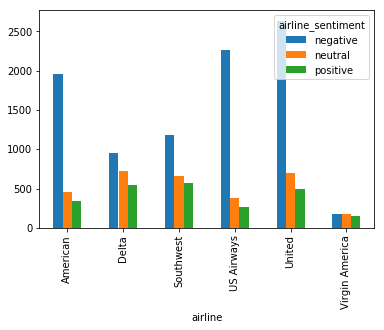

In [15]:
# Uma visão por airline mostra que as reclamações predominam para todas (exceto a Virgin America,
# que tem menos tweets no geral). Isso significa que inserir o nome da cia. aérea como feature
# não nos ajudaria a determinar o sentimento de um tweet.

pd.crosstab(backup['airline'], backup['airline_sentiment']).plot(kind='bar')

In [16]:
# Para trabalhar com o texto como entrada para um classificador, precisamos tratá-lo de alguma forma.
# O primeiro passo do tratamento envolve, aqui:
# - Remover mentions: os @alguem não devem estar presentes no texto
# - Remover links: tanto críticas quanto elogios podem ter links, e não é possível saber o conteúdo sem acessar
# - Remover acentos e pontuação
# - Remover espaços desnecessários
# - Transformar o texto todo em minúsculas

import re

def clear_text(tweet):
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'http.?://[^\s]+[^\s]?', '', tweet)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    return tweet.rstrip().lstrip().lower()

In [17]:
# Vamos passar os tweets por um Stemmer.
# A função do Stemmer é remover prefixos e sufixos das palavras, para que termos similares
# não pareçam features diferentes para o modelo.

# Sugestão de exercício: usar um Lemmatizer ao invés de um Stemmer. O Lemmatizer leva em consideração
# morfologia e sintaxe ao padronizar os termos.
# https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

# Sugestão de exercício: usar um corretor ortográfico e corrigir as palavras que repetem grafia errada
# (como flightl, por exemplo).

from snowballstemmer import EnglishStemmer

stemmer = EnglishStemmer()
def stem_text(tweet):
    tweet = tweet.split(' ')
    tweet = stemmer.stemWords(tweet)
    return ' '.join(tweet)
    

In [18]:
# Exemplo de como funciona a limpeza do texto:

stem_text(clear_text("Hi @GOL, my name is Renan @rodrigo and THIS FLIGHT got me feeling like this picture:::: http://pudim.com.br"))

'hi my name is renan and this flight got me feel like this pictur'

In [19]:
# Aplicamos as duas funções à coluna de texto, criando uma feature de 'texto relevante', que será
# usada no classificador.

all_data['texto_relevante'] = all_data['text'].apply(clear_text).apply(stem_text)
all_data.sample(3)

,text,airline_sentiment,texto_relevante
467,@VirginAmerica thanks for the free birthday po...,positive,thank for the free birthday point yall are all...
1563,@united can I get on a stand by list from ASE ...,neutral,can i get on a stand by list from ase to ord i...
12629,@AmericanAir I am traveling from AUH to IAD vi...,neutral,i am travel from auh to iad via etihad and the...


In [20]:
# Podemos construir três nuvens de palavras - uma para cada categoria - para visualizar
# quais são os termos mais comuns, e verificar que há um contexto 

import wordcloud

positive = all_data[all_data['airline_sentiment'] == 'positive']
neutral = all_data[all_data['airline_sentiment'] == 'neutral']
negative = all_data[all_data['airline_sentiment'] == 'negative']

(-0.5, 399.5, 199.5, -0.5)

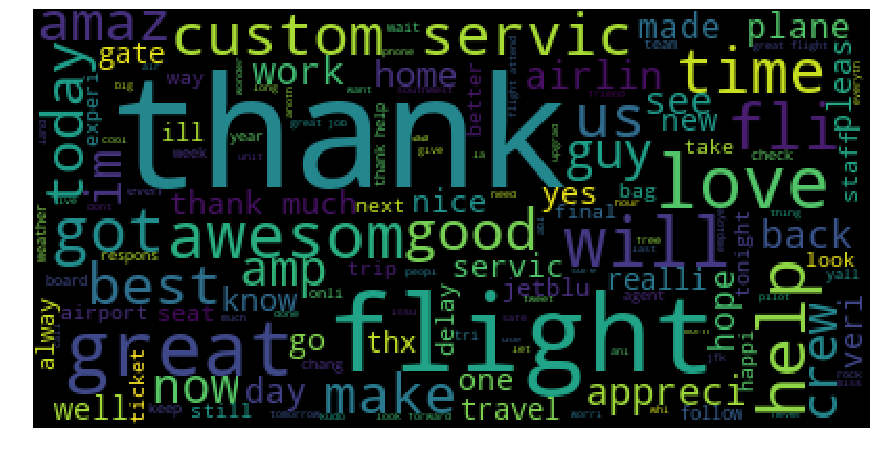

In [21]:
wc = wordcloud.WordCloud().generate(' '.join(positive['texto_relevante']))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

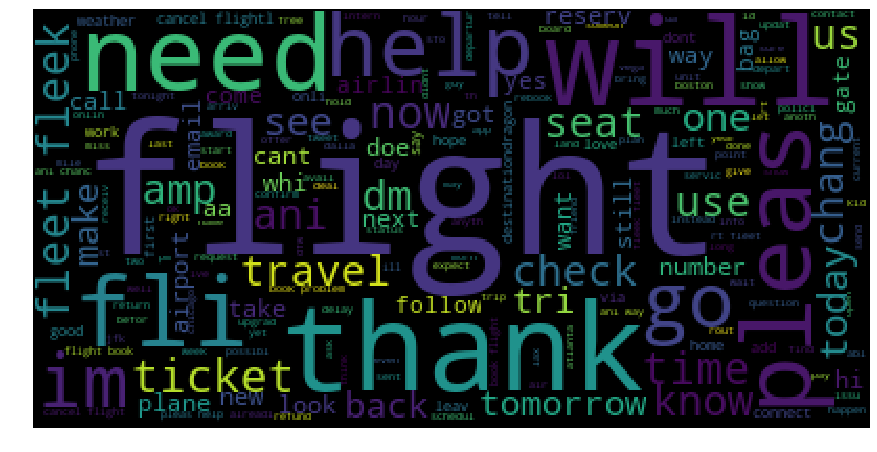

In [22]:
wc = wordcloud.WordCloud().generate(' '.join(neutral['texto_relevante']))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

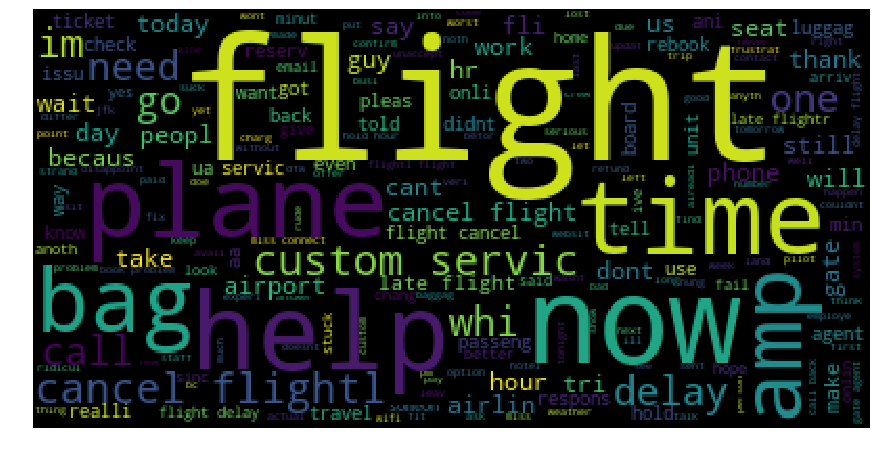

In [23]:
wc = wordcloud.WordCloud().generate(' '.join(negative['texto_relevante']))
plt.figure(figsize=(15,10))
plt.imshow(wc)
plt.axis('off')

In [24]:
# Podemos separar agora as features de entrada ( o texto ) e a de saída ( o sentimento ).
# Lembrando que todo novo tweet deve passar por esse tratamento antes de ser avaliado pelo modelo!

X = all_data['texto_relevante']
y = all_data['airline_sentiment']

In [25]:
# Dividimos os dados em treinamento e teste

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [26]:
# Precisamos transformar as palavras do texto em features numéricas. A maneira mais simples de fazer isso é
# usar um 'bag of words' - uma matriz esparsa, com as colunas definidas por cada uma das palavras do
# conjunto todo de tweets, sem repetição. Os tweets se tornam as linhas da matriz, com cada coluna correspondendo
# ao número de ocorrências da palavra naquele tweet.

# Vamos usar uma técnica chamada de TF-IDF (term frequency–inverse document frequency). Essa técnica
# divide o número de ocorrências da palavra pela quantidade de vezes em que ela aparece em todo o
# dataset, minimizando os pesos de palavras que se repetem em muitos tweets, e aumentando a relevância
# das palavras que aparecem menos.

# Vamos criar n_grams (sequências de palavras) de até duas palavras. Significa que a frase "my name is renan"
# será transformada em ['my', 'name', 'is', 'renan', 'my name', 'name is', 'is renan'].
# Isso será feito porque o Bag of Words desconsidera a sequência das palavras, somente contando as ocorrências.

# Vamos ignorar as palavras que apareçam em mais de 75% dos tweets porque são muito genéricas.
# Vamos ignorar as palavras que apareçam no máximo 2x nos tweets porque são muito específicas.

# Sugestão de exercício: variar o número de n_grams e medir o impacto no resultado final.
# Variar também os limites de ocorrência das palavras

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1, 2), max_df=0.75, min_df=3)

In [27]:
# Não fizemos isso antes de separar o conjunto de treinamento e de teste porque o 'df (document frequency)'
# levaria em consideração os tweets de teste para definir os pesos. Os dados de teste não devem ser
# tocados até a estimativa de E_out!

# O modelo do TfidfVectorizer precisa ser salvo, dado que um novo tweet precisa ser transformado para
# ser enviado ao classificador.

tf_train = tfidf.fit_transform(X_train)
tf_test = tfidf.transform(X_test)

In [28]:
# Os modelos de classificador que vamos usar são:
# - Naive bayes
# - Regressão Logística
# - K-neighbors
# - Árvore de decisão
# - Random Forest
# - Support Vector Classifier (exemplo com kernel linear)

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

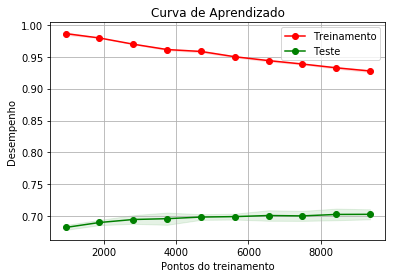

In [29]:
# Começamos com uma instância de Naive Bayes.
# O maior problema é que como é um algoritmo simples, ele não trabalha com a matriz esparsa.
# Precisaremos de uma matriz de verdade... (demora e ocupa bastante memória :/)

naive_bayes = GaussianNB()
plot_learning_curve(naive_bayes, tf_train.toarray(), y_train, cv=5)

Confusion matrix, without normalization
[[1634  138   87]
 [ 254  209  149]
 [ 178   66  213]]


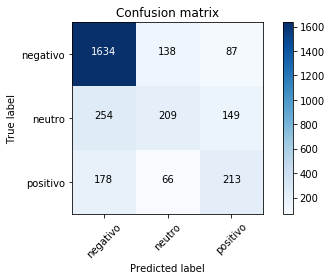

In [30]:
# O algoritmo parece ter estabilizado próximo de 0.7, mas generaliza mal.
# Como estamos tratando de linguagem natural, esperamos realmente que a generalização seja pior porque
# as pessoas escrevem de forma diferente (:

# Seriam necessários MUITOS dados e um bom modelo para evitar generalização.

# Para avaliar um modelo de classificação, é interessante avaliar não só o quanto ele pode acertar,
# mas como ele se comporta como erra. Isso porque as funções de erro podem ter pesos variados para
# cada problema.

# Vamos treinar o modelo com os dados de treinamento, usar o modelo para predizer os valores de teste
# e criar uma matriz de confusão com os resultados.

from sklearn.metrics import confusion_matrix

naive_bayes.fit(tf_train.toarray(), y_train)
pred = naive_bayes.predict(tf_test.toarray())
matrix = confusion_matrix(y_pred=pred, y_true=y_test)
plot_confusion_matrix(matrix, ['negativo', 'neutro', 'positivo'])

In [31]:
# A partir da matriz, podemos extrair algumas métricas (dentre elas, o f1_score - que é o valor apresentado
# pelo modelo no método score()).
# Podemos ver através do relatório de classificação, para cada classe:
# - precisão (%) : qual a proporção entre os dados classificados corretamente e os que o modelo colocou nessa classe
# - recall (%) : qual a proporção entre os dados classificados corretamente e os que efetivamente são dessa classe
# - f1_score : média harmônica entre os dois valores anteriores
# - support : número de pontos em cada classe

# https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

# O f1_score considerado é o micro-avg (média ponderada dos f1 de cada classe).

# Podemos ver que o modelo não é ruim para identificar os negativos, mas se perde bastante nas outras classes.
# O pior valor é o recall dos neutros, ou seja:
# Usando probabilidade simples, é difícil dizer quando um tweet é neutro. A maioria dos neutros foi
# colocada em outra classe.

from sklearn.metrics import classification_report

print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.79      0.88      0.83      1859
     neutral       0.51      0.34      0.41       612
    positive       0.47      0.47      0.47       457

   micro avg       0.70      0.70      0.70      2928
   macro avg       0.59      0.56      0.57      2928
weighted avg       0.68      0.70      0.69      2928



<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

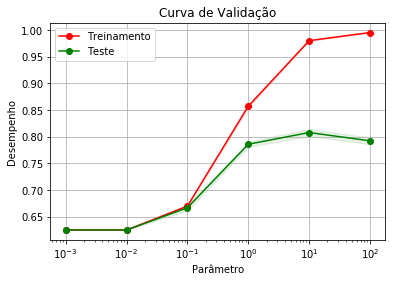

In [32]:
# Vamos comparar os resultados do Naive Bayes com a regressão logística.
# Ao contrário do Titanic, vamos usar aqui um valor de regularização para o modelo.
# O parâmetro C pode ser entendido como 1 / alpha.

logistic_regression = LogisticRegression()
plot_validation_curve(logistic_regression, tf_train, y_train, 'C', [0.001, 0.01, 0.1, 1, 10, 100], cv=5)

<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

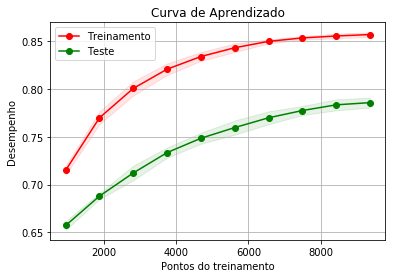

In [33]:
# Vemosq que para C=1 temos um erro de generalização razoável, comparado com o ganho no desempenho
# de validação. Vamos usar esse valor e observar a curva de aprendizagem

logistic_regression = LogisticRegression(C=1)
plot_learning_curve(logistic_regression, tf_train, y_train, cv=5)

In [34]:
# Podemos ver que o modelo generaliza melhor e tem um score melhor do que o Naive Bayes!
# Podemos também ver, pelo gráfico de aprendizado, que o modelo ainda pode melhorar com mais dados de treinamento.
# A dificuldade continua sendo com os neutros, mas os scores são mais equilibrados e estáveis

logistic_regression.fit(tf_train, y_train)
pred = logistic_regression.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.79      0.96      0.87      1859
     neutral       0.74      0.43      0.55       612
    positive       0.88      0.57      0.69       457

   micro avg       0.79      0.79      0.79      2928
   macro avg       0.80      0.65      0.70      2928
weighted avg       0.79      0.79      0.77      2928



<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

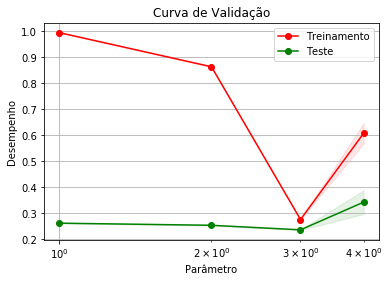

In [35]:
# Vamos tentar classificar os tweets com um K-Neighbors
# Traçando a curva de validação, vemos como o número de neighbors influencia o algoritmo.

k_neighbors = KNeighborsClassifier()
plot_validation_curve(k_neighbors, tf_train, y_train, 'n_neighbors', [1, 2, 3, 4], cv=5)

In [36]:
# Vemos que o resultado não é dos melhores, e que como os dados são muito esparsos, a quantidade de vizinhos
# maior atrapalha e confunde o algoritmo. Além disso, o fato de os dados serem esparsos faz com que cada
# seleção de conjunto de treinamento dê resultados diferentes para o número de vizinhos :/

# No entanto, olhando para os resultados da classificação, alguns valores são curiosamente bons!

k_neighbors = KNeighborsClassifier(n_neighbors=2)
k_neighbors.fit(tf_train, y_train)
pred = k_neighbors.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.75      0.06      0.10      1859
     neutral       0.21      0.94      0.35       612
    positive       0.89      0.15      0.26       457

   micro avg       0.26      0.26      0.26      2928
   macro avg       0.62      0.38      0.24      2928
weighted avg       0.66      0.26      0.18      2928



<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

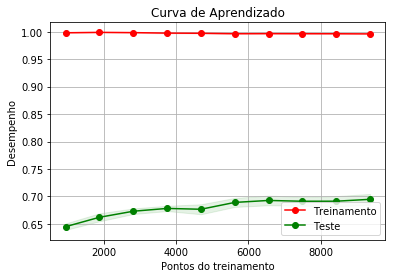

In [37]:
# Vamos verificar uma árvore de decisão para classificar os tweets.

decision_tree = DecisionTreeClassifier()
plot_learning_curve(decision_tree, tf_train, y_train, cv=5)

In [38]:
# Após o treinamento, olhando para a classificação, vemos que o desempenho é inferior ao da regressão logística.
# Além disso, o modelo apresenta overfit com poucos pontos de treinamento.

decision_tree.fit(tf_train, y_train)
pred = decision_tree.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      1859
     neutral       0.48      0.49      0.49       612
    positive       0.59      0.56      0.58       457

   micro avg       0.70      0.70      0.70      2928
   macro avg       0.62      0.62      0.62      2928
weighted avg       0.70      0.70      0.70      2928



<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

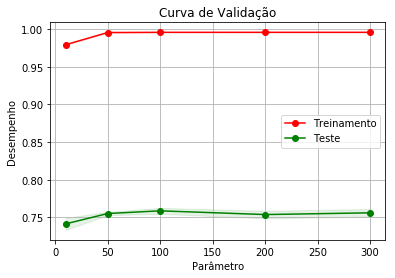

In [39]:
# Podemos treinar uma floresta para tentar melhorar os scores da árvore de decisão.
# Vamos variar o número de árvores na floresta, mas há outros parâmetros (como o número de folhas, por exemplo)
# que poderiam ser variados.

random_forest = RandomForestClassifier()
plot_validation_curve(random_forest, tf_train, y_train, 'n_estimators', [10, 50, 100, 200, 300], cv=5, log=False)

In [40]:
# Pudemos ver uma melhora geral quando comparamos com uma única árvore, mas alguns scores (como o recall de neutros)
# ficaram tão baixos quanto o Naive Bayes.
# Talvez usar um ensemble (mistura de vários algoritmos) com um regularizador ou otimizador melhorasse esse desempenho.

random_forest = RandomForestClassifier(n_estimators=50)
random_forest.fit(tf_train, y_train)
pred = random_forest.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.77      0.95      0.85      1859
     neutral       0.68      0.39      0.49       612
    positive       0.82      0.50      0.62       457

   micro avg       0.77      0.77      0.77      2928
   macro avg       0.76      0.61      0.66      2928
weighted avg       0.76      0.77      0.74      2928



<module 'matplotlib.pyplot' from 'c:\\users\\renan\\appdata\\local\\programs\\python\\python36\\lib\\site-packages\\matplotlib\\pyplot.py'>

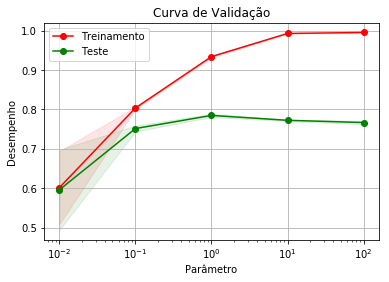

In [41]:
# Por último, vamos rodar um Suport Vector Classifier com um kernel linear.
# Instanciaremos class_weight='balanced' para que ele realize o treinamento levando em consideração
# pesos relativos para as classes (sem esse parâmetro, ele pesaria todas as classes igualmente).

# Procuramos o melhor coeficiente de regularização.

svc = SVC(class_weight='balanced', kernel='linear')
plot_validation_curve(svc, tf_train, y_train, 'C', [0.01, 0.1, 1, 10, 100], cv=5)

In [42]:
# Agora, escolhemos entre 0.1 (que é o parâmetro que generaliza melhor) e 1 (que é o que performa melhor,
# perdendo em generalização).
# Os resultados são muito bons! O score é o mesmo da regressão logística, mas os números mostram um
# modelo que não pesa para uma única classe. Se, no futuro, vierem muito mais elogios do que críticas e reclamações,
# classificaremos melhor aqui (:

# Sugestão de exercício: ler a documentação do SVC, trocar o kernel, variar parâmetros!

svc = SVC(class_weight='balanced', kernel='linear', C=1)
svc.fit(tf_train, y_train)
pred = svc.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.89      0.84      0.86      1859
     neutral       0.59      0.69      0.64       612
    positive       0.73      0.73      0.73       457

   micro avg       0.79      0.79      0.79      2928
   macro avg       0.74      0.75      0.74      2928
weighted avg       0.80      0.79      0.79      2928



In [43]:
# O Support Vector Classifier não funciona com One-vs-Rest (técnica para várias classes), então
# usamos um método para construir esse comportamento.

# Observamos uma pequena melhora percentual de precisões e recalls, mas o resultado médio é o mesmo.
# Pagamos essas pequenas melhoras com o recall de neutros - maior desafio do dataset.

from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(SVC(class_weight='balanced', kernel='linear', C=1))
clf.fit(tf_train, y_train)
pred = clf.predict(tf_test)
print(classification_report(y_pred=pred, y_true=y_test))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.87      1859
     neutral       0.59      0.67      0.63       612
    positive       0.73      0.72      0.73       457

   micro avg       0.79      0.79      0.79      2928
   macro avg       0.74      0.75      0.74      2928
weighted avg       0.80      0.79      0.80      2928



In [49]:
# Vamos ver como nos saímos com o SVC:
new_tweet = "@VoeGOLoficial the flight was fast and clear, congrats ;)"
clean_tweet = clear_text(stem_text(new_tweet))
vectorized = tfidf.transform([clean_tweet])
prediction = clf.predict(vectorized)
print(f'Resultado para esse tweet: {prediction}!')

Resultado para esse tweet: ['positive']!
